In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [101]:
df=pd.read_csv("C:/Users/S/Desktop/College/Machine Learning/Group Work/Research 2/BlackFriday.csv")

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


Text(0, 0.5, 'Count')

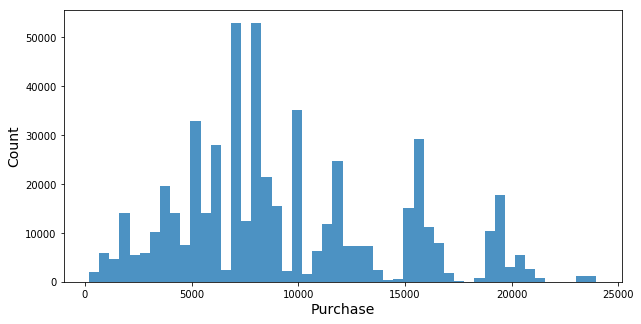

In [103]:
#Distribution of Target variable "Purchase" on Raw Data
plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)


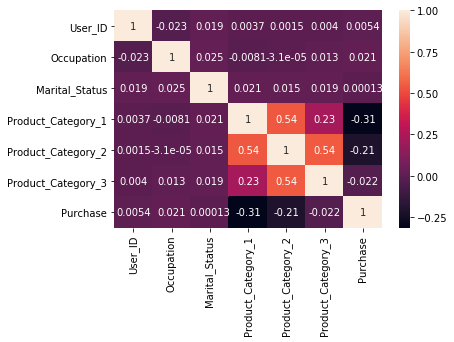

In [105]:
sns.heatmap(
    df.corr(),
    annot=True
)

In [107]:
df.describe()
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [108]:
print('<Contain NaNs?>')
print(df.isnull().any())
#checking for missing values

<Contain NaNs?>
User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool


In [109]:
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)
#A brief investigation revealed that ~31% and ~69% data are NaNs in Product_Category_2 and Product_Categroy_3, respectively.
#As the datatype of Product_Category_1 is int, these NaNs were filled with 0.


<NaN ratio>
Product_Category_3    69.44
Product_Category_2    31.06
Name: missing values %, dtype: float64


In [110]:
df.fillna(0,inplace=True)
#Since most products will belong to only one category, it makes sense for less products to have a second category, let alone a third one.
#Therefore just put zero

In [111]:
df.describe()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [115]:
for col in df.columns:
    print('{} unique element: {}'.format(col,df[col].nunique()))

Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959


In [116]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
#Assuming UserID and ProductID have no impact on the purchase outcome/amount of purchase
df.info()

KeyError: "['User_ID' 'Product_ID'] not found in axis"

In [114]:
df.head()



,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [117]:
#Removing special character (+) in the columns 'Age' and 'stay in Current City_Years,

df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))


In [118]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null float64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 41.0+ MB


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,0.0,0.0,8370
1,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,F,0-17,10,A,2.0,0,12,0.0,0.0,1422
3,F,0-17,10,A,2.0,0,12,14.0,0.0,1057
4,M,55,16,C,4.0,0,8,0.0,0.0,7969


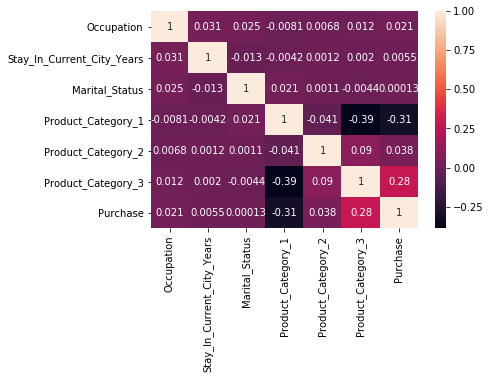

In [119]:
#heat map after pre-processing
import seaborn as sns
sns.heatmap(
    df.corr(),
    annot=True
)


Text(0, 0.5, 'Count')

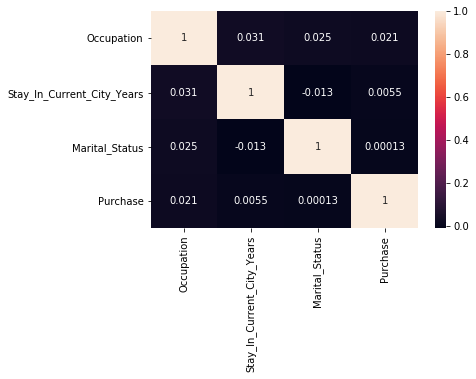

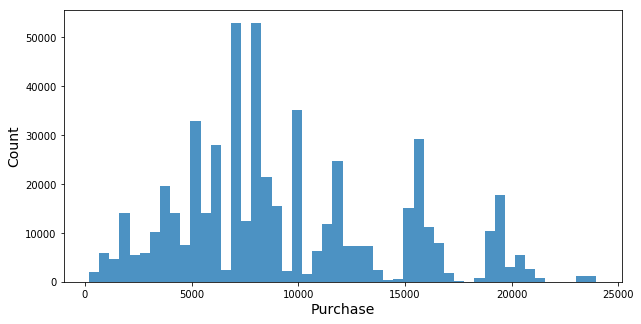

In [120]:
#Removing irrelevant features
sns.heatmap(
    df[['Gender','Occupation','Stay_In_Current_City_Years','Marital_Status','Purchase']].corr(),
    
    annot=True
)

#Purchase distribution: Distribution of target var
plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)


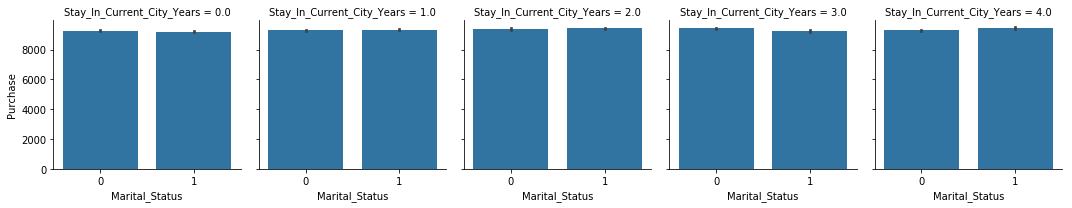

In [72]:
#Trying to see the effect of increasing one variable 
#(of the 3 identified vars in heat map)


g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

#Can't tell much from this--should've been expected as we can observe that the correlation between them is low


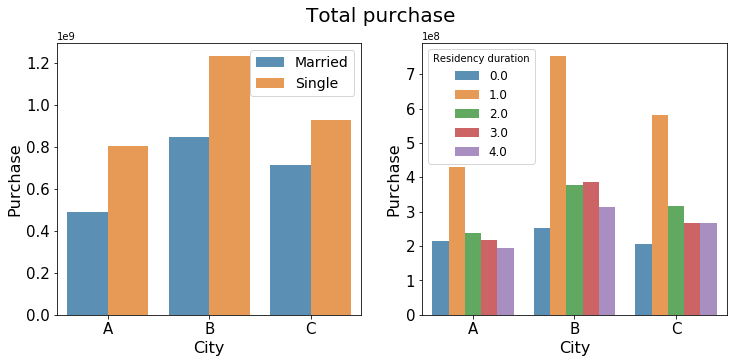

In [121]:
#Trying to observe the above trend across different cities

df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()

fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=16)
plt.ylabel('Purchase',fontsize=16)
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=16)
plt.ylabel('Purchase',fontsize=16)
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)

#It was shown that unmarried customers spent more than the married. 
#Customers who lived in their city for 1 year tend to spend more than other groups.


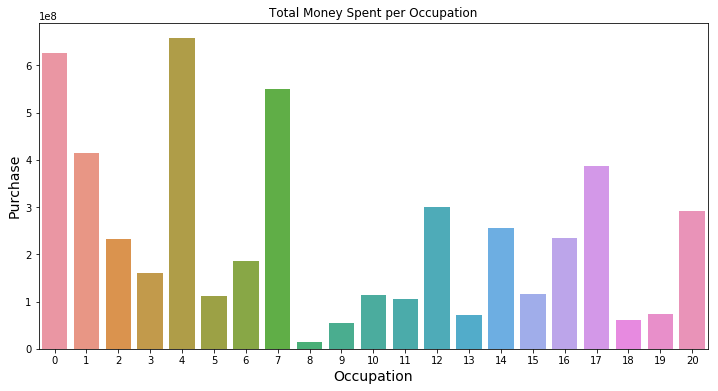

In [123]:
#Total money spent per occupation

spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.xlabel('Occupation',fontsize=14)
plt.ylabel('Purchase',fontsize=14)

plt.title('Total Money Spent per Occupation')
plt.show()

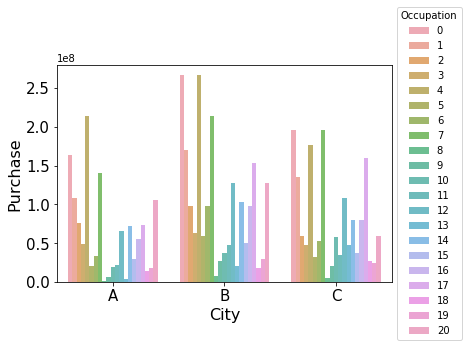

In [124]:
#Purchase per occupation categorized by city
city_order = ['A','B','C']

plt.tick_params(labelsize=15)


df_Tpurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Tpurchase_by_City,alpha = 0.8)

plt.xlabel('City',fontsize=16)
plt.ylabel('Purchase', fontsize=16)
plt.legend().set_visible(False)

plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)

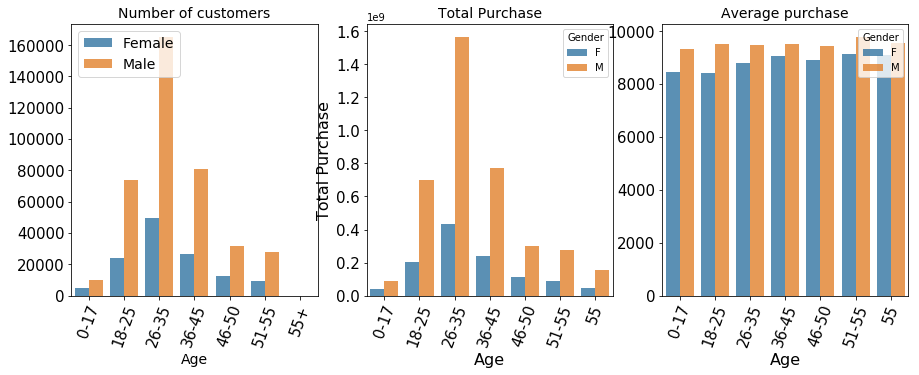

In [95]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('Age',order=age_order,hue='Gender',data=df,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(132)
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Total Purchase',fontsize=16)
plt.xticks(rotation=70)
plt.title('Total Purchase',fontsize=14)

plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Average purchase',fontsize=16)
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)

plt.tick_params(labelsize=15)

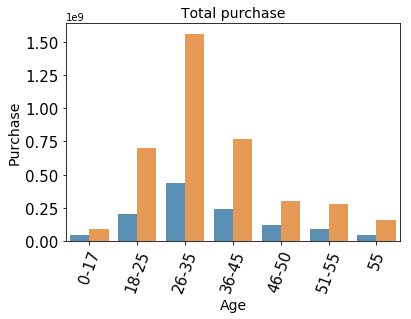

In [126]:
#Analysing the impact of gender and age
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure()
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.legend(title='Gender',frameon=True,fontsize=12)

plt.xlabel('Age',fontsize=14)
plt.ylabel('Purchase',fontsize=14)

plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

In [95]:
df.describe()
df.head(20)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2.0,0,3,0.0,0.0,8370
1,0,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,0,0-17,10,A,2.0,0,12,0.0,0.0,1422
3,0,0-17,10,A,2.0,0,12,14.0,0.0,1057
4,1,55,16,C,4.0,0,8,0.0,0.0,7969
5,1,26-35,15,A,3.0,0,1,2.0,0.0,15227
6,1,46-50,7,B,2.0,1,1,8.0,17.0,19215
7,1,46-50,7,B,2.0,1,1,15.0,0.0,15854
8,1,46-50,7,B,2.0,1,1,16.0,0.0,15686
9,1,26-35,20,A,1.0,1,8,0.0,0.0,7871


In [105]:
df.to_csv('C:/Users/S/Desktop/BlackFriday_Processed.csv', index=False, sep=',')